In [1]:
import re
import pdb
import string
import nltk
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from os import getcwd
from nltk.stem import PorterStemmer
from matplotlib.patches import Ellipse
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples
from utils import process_tweet, build_freqs, sigmoid, gradientDescent, test_logistic_regression, extract_features, predict_tweet, confidence_ellipse, count_tweets, train_naive_bayes, lookup, naive_bayes_predict, test_naive_bayes, get_ratio, get_words_by_threshold

# Data Preprocessing

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [3]:
freqs = count_tweets({}, train_x, train_y)

In [4]:
train_y

array([1., 1., 1., ..., 0., 0., 0.])

# Model Training

In [10]:
logprior, loglikelihood, data = train_naive_bayes(freqs, train_x, train_y)
print('LogPrior:', logprior)
print(len(loglikelihood))

LogPrior: 0.0
15127


In [6]:
loglikelihood

{'easili': -0.452940736126882,
 'melodi': 0.6456715525412289,
 'ohstylesss': 0.6456715525412289,
 'steelseri': -0.7406228085786619,
 'harsh': -0.7406228085786619,
 'weapon': -0.452940736126882,
 'maxdjur': -0.7406228085786619,
 'thalaivar': 0.6456715525412289,
 'theroyalfactor': 0.6456715525412289,
 'fought': 0.6456715525412289,
 'louisemensch': -0.7406228085786619,
 'hayli': 0.6456715525412289,
 'dumbest': -0.7406228085786619,
 'where': -0.7406228085786619,
 'prada': -0.7406228085786619,
 'bocassweet': -0.7406228085786619,
 'ｍｅ': -3.6309945664748273,
 'oldmanmyk': 0.6456715525412289,
 'edel': -0.7406228085786619,
 'premierhomestx': 0.6456715525412289,
 'latl': 0.6456715525412289,
 'podolski': 1.0511366606493926,
 'mine': 0.03953574897091272,
 'chloeeelmore': 0.6456715525412289,
 'umaga': 0.6456715525412289,
 'borapl': -0.7406228085786619,
 'ahaha': -0.7406228085786619,
 'appveyor': 0.6456715525412289,
 'groan': -0.7406228085786619,
 'loyal': 1.0511366606493926,
 'uber_rsa': -1.1460879

In [7]:
d = pd.DataFrame(data)
d

,word,positive,negative,sentiment
0,easili,-10.072428,-9.619488,0
1,melodi,-10.072428,-10.718100,1
2,ohstylesss,-10.072428,-10.718100,1
3,steelseri,-10.765575,-10.024953,0
4,harsh,-10.765575,-10.024953,0
...,...,...,...,...
15122,theeconomist,-10.072428,-10.718100,1
15123,kepo,-10.072428,-10.024953,0
15124,darcey,-10.765575,-10.024953,0
15125,yess,-10.072428,-9.619488,0


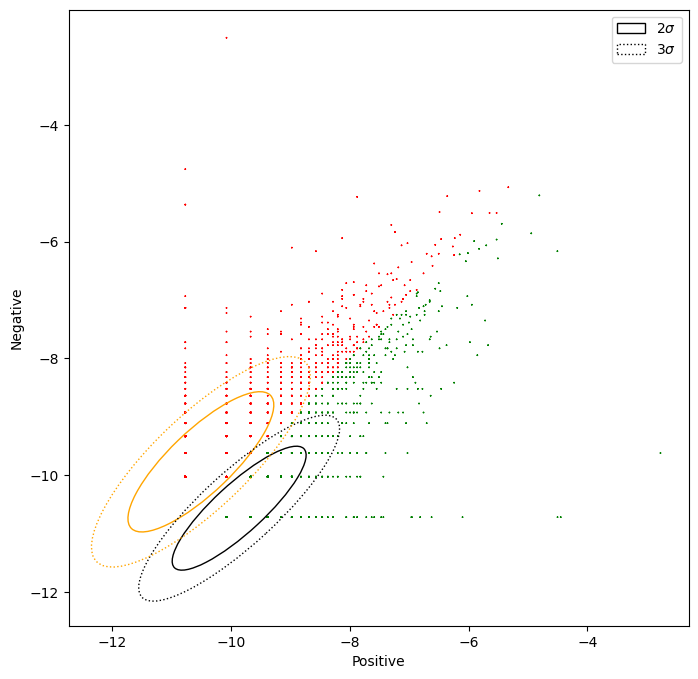

In [8]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

ax.scatter(d['positive'], d['negative'], c = [colors[int(k)] for k in d['sentiment']], s = 0.1, marker = '*')

plt.xlabel("Positive")
plt.ylabel("Negative")

d_pos = d[d['sentiment'] == 1] 
d_neg = d[d['sentiment'] == 0]

confidence_ellipse(d_pos.positive, d_pos.negative, ax, n_std = 2, edgecolor = 'black', label = r'$2\sigma$' )
confidence_ellipse(d_neg.positive, d_neg.negative, ax, n_std = 2, edgecolor = 'orange')

confidence_ellipse(d_pos.positive, d_pos.negative, ax, n_std = 3, edgecolor = 'black', linestyle = ':', label = r'$3\sigma$')
confidence_ellipse(d_neg.positive, d_neg.negative, ax, n_std = 3, edgecolor = 'orange', linestyle = ':')
ax.legend()

plt.show()

In [15]:
vali_tweet = [

    "Another day, another opportunity.",

    "Do the right things, do things right.",

    "Celebrate the journey, not just the destination.",

    "Every sunset is an opportunity to reset.",

    "Stars can not shine without darkness.",

    "Inhale courage, exhale fear.",

    "Radiate kindness like sunshine.",

    "Find beauty in the ordinary.",

    "Chase your wildest dreams with the heart of a lion.",

    "Life is a canvas; make it a masterpiece.",

    "Let your soul sparkle.",

    "Create your own sunshine.", 

    "This summer would not be perfect without you." ]


for tweet in vali_tweet:
    print('Tweets:', tweet)
    print('Stem:', process_tweet(tweet))
    print('%s -> %f' % (tweet, naive_bayes_predict(tweet, logprior, loglikelihood)))
    print('\n')

Tweets: Another day, another opportunity.
Stem: ['anoth', 'day', 'anoth', 'opportun']
Another day, another opportunity. -> 2.267723


Tweets: Do the right things, do things right.
Stem: ['right', 'thing', 'thing', 'right']
Do the right things, do things right. -> -0.122857


Tweets: Celebrate the journey, not just the destination.
Stem: ['celebr', 'journey', 'destin']
Celebrate the journey, not just the destination. -> -0.324748


Tweets: Every sunset is an opportunity to reset.
Stem: ['everi', 'sunset', 'opportun', 'reset']
Every sunset is an opportunity to reset. -> 2.054798


Tweets: Stars can not shine without darkness.
Stem: ['star', 'shine', 'without', 'dark']
Stars can not shine without darkness. -> 0.572238


Tweets: Inhale courage, exhale fear.
Stem: ['inhal', 'courag', 'exhal', 'fear']
Inhale courage, exhale fear. -> -0.142427


Tweets: Radiate kindness like sunshine.
Stem: ['radiat', 'kind', 'like', 'sunshin']
Radiate kindness like sunshine. -> 1.410585


Tweets: Find beauty

# Model Testing

In [7]:
print("Naive Bayes model's accuracy = %0.4f" % (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9950


In [8]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

I am happy -> 2.10
I am bad -> -1.35
this movie should have been great. -> 2.05
great -> 2.09
great great -> 4.19
great great great -> 6.28
great great great great -> 8.37


# Result Analysis

In [9]:
get_ratio(freqs, 'happi')

{'positive': 162, 'negative': 18, 'ratio': 8.578947368421053}

In [10]:
get_words_by_threshold(freqs, label = 0, threshold = 0.05)

{':(': 0.000544069640914037,
 ':-(': 0.002583979328165375,
 'zayniscomingbackonjuli': 0.05,
 '>:(': 0.022727272727272728,
 'lost': 0.05,
 '♛': 0.004739336492890996,
 '》': 0.004739336492890996,
 'beli̇ev': 0.027777777777777776,
 'wi̇ll': 0.027777777777777776,
 'justi̇n': 0.027777777777777776,
 'ｓｅｅ': 0.027777777777777776,
 'ｍｅ': 0.027777777777777776}

In [11]:
get_words_by_threshold(freqs, label = 1, threshold = 10)

{'followfriday': 24.0,
 'commun': 14.0,
 ':)': 987.0,
 'bhaktisbant': 17.0,
 'flipkartfashionfriday': 17.0,
 ':d': 524.0,
 ':p': 106.0,
 'influenc': 17.0,
 'jnlazt': 63.0,
 ':-)': 553.0,
 "here'": 21.0,
 'youth': 15.0,
 'tolajobjob': 15.0,
 'bam': 45.0,
 'barsandmelodi': 45.0,
 '969horan696': 45.0,
 'warsaw': 45.0,
 'shout': 12.0,
 ';)': 23.0,
 'stat': 52.0,
 'arriv': 11.6,
 'glad': 14.0,
 'impastel': 18.0,
 'blog': 28.0,
 'fav': 12.0,
 'fantast': 10.0,
 'fback': 27.0,
 'adeccowaytowork': 10.0,
 'pleasur': 11.0,
 '←': 10.0,
 'aqui': 10.0}